## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing the dataset

In [3]:
Training_dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')
Training_dataset = Training_dataset.dropna()
X_train = np.array(Training_dataset.iloc[:, :-1].values)
y_train = np.array(Training_dataset.iloc[:, 1].values)

In [4]:
Testing_dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')
Testing_dataset = Testing_dataset.dropna()
X_test = np.array(Testing_dataset.iloc[:, :-1].values)
y_test = np.array(Testing_dataset.iloc[:, 1].values)

In [5]:
y_train = y_train.reshape(len(y_train),1)

In [6]:
y_test = y_test.reshape(len(y_test),1)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Test set results

In [9]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 77.08  79.78]
 [ 20.88  23.18]
 [ 21.92  25.61]
 [ 19.84  17.86]
 [ 35.96  41.85]
 [ 14.54   9.81]
 [ 62.03  58.87]
 [ 94.58  97.62]
 [ 19.84  18.4 ]
 [  4.76   8.75]
 [  3.99   2.81]
 [ 18.79  17.1 ]
 [ 95.34  95.15]
 [ 62.03  61.39]
 [ 35.96  40.25]
 [ 14.54  14.82]
 [ 65.04  66.96]
 [ 13.48  16.64]
 [ 87.21  90.66]
 [ 69.05  77.23]
 [ 89.19  92.12]
 [ 50.99  46.91]
 [ 89.19  89.83]
 [ 27.    21.71]
 [ 96.05  97.41]
 [ 58.01  57.02]
 [ 79.1   78.31]
 [ 20.88  19.13]
 [ 92.91  93.03]
 [ 27.    26.59]
 [ 97.28  97.55]
 [ 30.99  31.44]
 [ 32.98  35.13]
 [ 80.11  78.61]
 [ 28.    33.07]
 [ 46.98  51.7 ]
 [ 52.99  53.62]
 [ 69.05  69.46]
 [ 28.    27.42]
 [ 32.98  36.35]
 [ 91.1   95.06]
 [ 71.06  68.17]
 [ 49.99  50.96]
 [ 76.07  78.04]
 [  3.99   5.61]
 [ 36.96  36.11]
 [ 70.06  67.24]
 [ 68.05  65.01]
 [ 39.96  38.15]
 [ 34.97  34.31]
 [ 93.77  95.29]
 [ 88.2   87.85]
 [ 51.99  54.08]
 [ 30.99  31.93]
 [ 59.01  59.61]
 [  1.64  -1.04]
 [ 38.96  47.49]
 [ 64.04  62.6 ]
 [ 69.05  70.9

## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9882912537015398

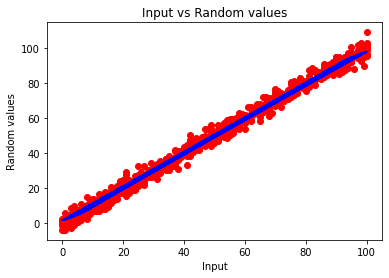

In [11]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(regressor.predict(X_train)), color = 'blue')
plt.title('Input vs Random values')
plt.xlabel('Input')
plt.ylabel('Random values')
plt.show()

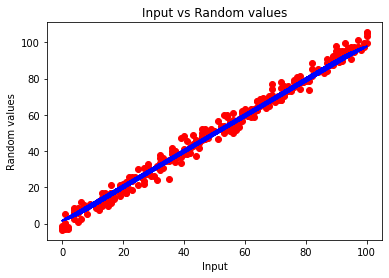

In [12]:
# Visualising the SVR results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(regressor.predict(X_train)), color = 'blue')
plt.title('Input vs Random values')
plt.xlabel('Input')
plt.ylabel('Random values')
plt.show()

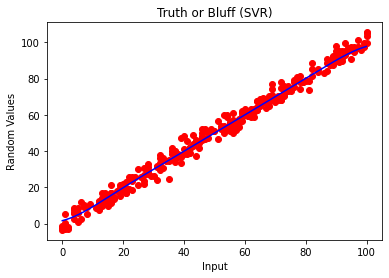

In [13]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X_train)), max(sc_X.inverse_transform(X_train)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Input')
plt.ylabel('Random Values')
plt.show()